# Predictive Model of Hotel Booking Cancellations

### Libraries 

In [1]:
import os
from pathlib import Path
from math import ceil
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
import graphviz
import dtale
import phik
from phik import resources, report
from numpy import quantile, where, random

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2 as chis2
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import (Normalizer,MinMaxScaler,RobustScaler,StandardScaler,
                                   OneHotEncoder,OrdinalEncoder,PowerTransformer,QuantileTransformer)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings("ignore")
import logging
from sklearn.cluster import KMeans
logging.getLogger('matplotlib').setLevel(logging.ERROR)

## Functions 

In [2]:
def c_matrix(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                     VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

## Collect Initial Data

Loading the data : 

In [3]:
data = pd.read_csv("H2.csv")

In [4]:
df = data.copy()

#### Features
- ADR : Average Daily Rate (num)
- Adult : Nmb of adults (num)
- Agent : ID travel agency that made the booking (cat)
- ArrivalDateDayOfMonth : Day of the month of the arrival date (num)
- ArrivalDateMonth : Month of arrival date with 12 categories: “January” to “December” (cat)
- ArrivalDateWeekNumber : Week number of the arrival date 
- ArrivalDateYear :Year of the arrival date
- AssignedRoomType : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons (cat)
- Babies : Number of babies (num) 
- BookingChanges : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation (num)
- Children : nb of children (num)
- Company : ID of the company/entity that made the booking or responsible for paying the booking.(cat)
- Country : country of origin Categories are represented in the ISO 3155-3:2013 format (cat)
- CustomerType : Type of booking, assuming one of four possible categories (presented below) (cat)
- DaysInWaitingList : Number of days the booking was in the waiting list before it was confirmed to the customer (num)
- DepositType : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories (presented) (cat)
- DistributionChannel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” (cat)
- IsCanceled : Value indicating if the booking was canceled (1) or not (0)(cat)
- IsRepeatedGuest :Value indicating if the booking name was from a repeated guest (1) or not (0) (cat)
- LeadTime Number of days that elapsed between the entering date of the booking and the arrival date (num)
- MarketSegment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” (cat)
- Meal : Type of meal booked. Categories are presented in standard hospitality meal packages (presented below) (cat)
- PreviousBookingsNotCanceled : Number of previous bookings not cancelled by the customer prior to the current booking (num)
- PreviousCancellations :Number of previous bookings that were cancelled by the customer prior to the current booking (num)
- RequiredCarParkingSpaces : Number of car parking spaces required by the customer (num)
- ReservationStatus : Reservation last status, assuming one of three categories (presented below) (cat)
- ReservationStatusDate : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel (date)
- ReservedRoomType :Code of room type reserved (cat)
- StaysInWeekendNights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel (nim)
- StaysInWeekNights :Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel (num)
- TotalOfSpecialRequests : Number of special requests made by the customer (e.g. twin bed or high floor) (num)


In [3]:
df.head(15)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
5,1,79,2015,July,27,2,0,3,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-06-25
6,0,3,2015,July,27,2,0,3,1,0.0,...,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
7,1,63,2015,July,27,2,1,3,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,0,Canceled,2015-06-25
8,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
9,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02


In [4]:
#dtale.show(df,ignore_duplicate=True)

In [284]:
df.columns

Index(['y', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'DaysInWaitingList',
       'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatusDate'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IsCanceled,79330.0,0.417270,0.493111,0.0,0.0,0.0,1.0,1.0
LeadTime,79330.0,109.735724,110.948526,0.0,23.0,74.0,163.0,629.0
ArrivalDateYear,79330.0,2016.174285,0.699181,2015.0,2016.0,2016.0,2017.0,2017.0
ArrivalDateWeekNumber,79330.0,27.177449,13.398523,1.0,17.0,27.0,38.0,53.0
ArrivalDateDayOfMonth,79330.0,15.786625,8.728451,1.0,8.0,16.0,23.0,31.0
StaysInWeekendNights,79330.0,0.795185,0.885026,0.0,0.0,1.0,2.0,16.0
StaysInWeekNights,79330.0,2.182957,1.456416,0.0,1.0,2.0,3.0,41.0
Adults,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Children,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
Babies,79330.0,0.004941,0.084323,0.0,0.0,0.0,0.0,10.0


In [11]:
df.isna().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [79]:
df.duplicated().sum() #disregard and treat it as seperate clients

25902

In [5]:
non_metric_features = []
metric_features = []
for col in list(df.columns):
    if df[col].dtype=='object':
        non_metric_features.append(col)
    else:
        metric_features.append(col)

In [6]:
metric_features.remove("IsCanceled")
metric_features.remove("IsRepeatedGuest")

In [7]:
non_metric_features.append("IsRepeatedGuest")

### Our Target 

In [8]:
# IsCanceled = Target
df.rename(columns={"IsCanceled" : "y"}, inplace=True)

In [9]:
df.head()

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


## Data Exploration

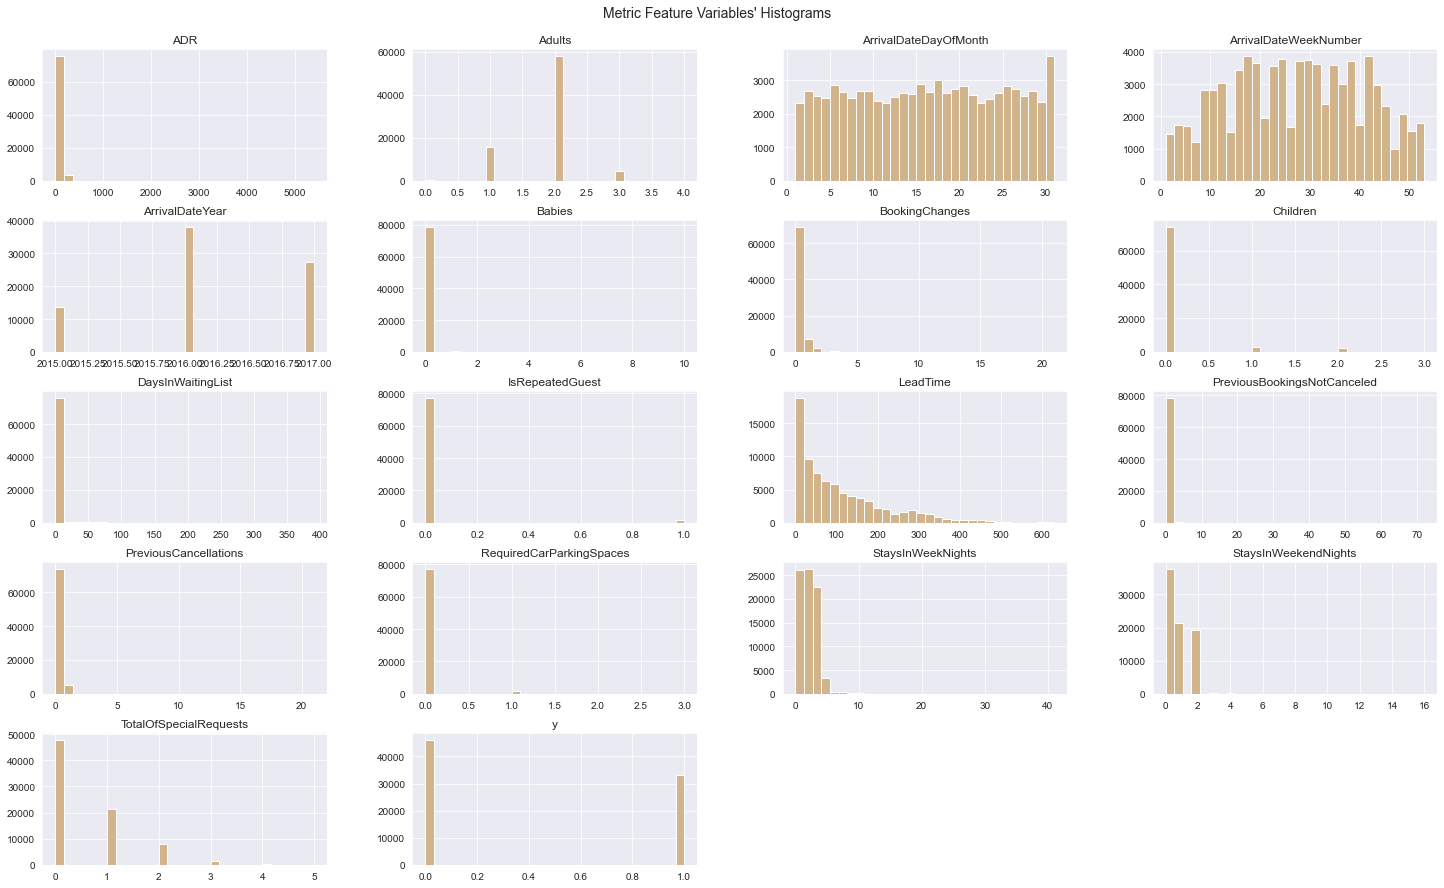

In [21]:
sns.set_style("darkgrid")
df.hist(figsize=(25,15),bins=30,xlabelsize=10,ylabelsize=10, color="tan")
title = "Metric Feature Variables' Histograms"
plt.suptitle(title, y=0.92, fontsize=14)
plt.show()

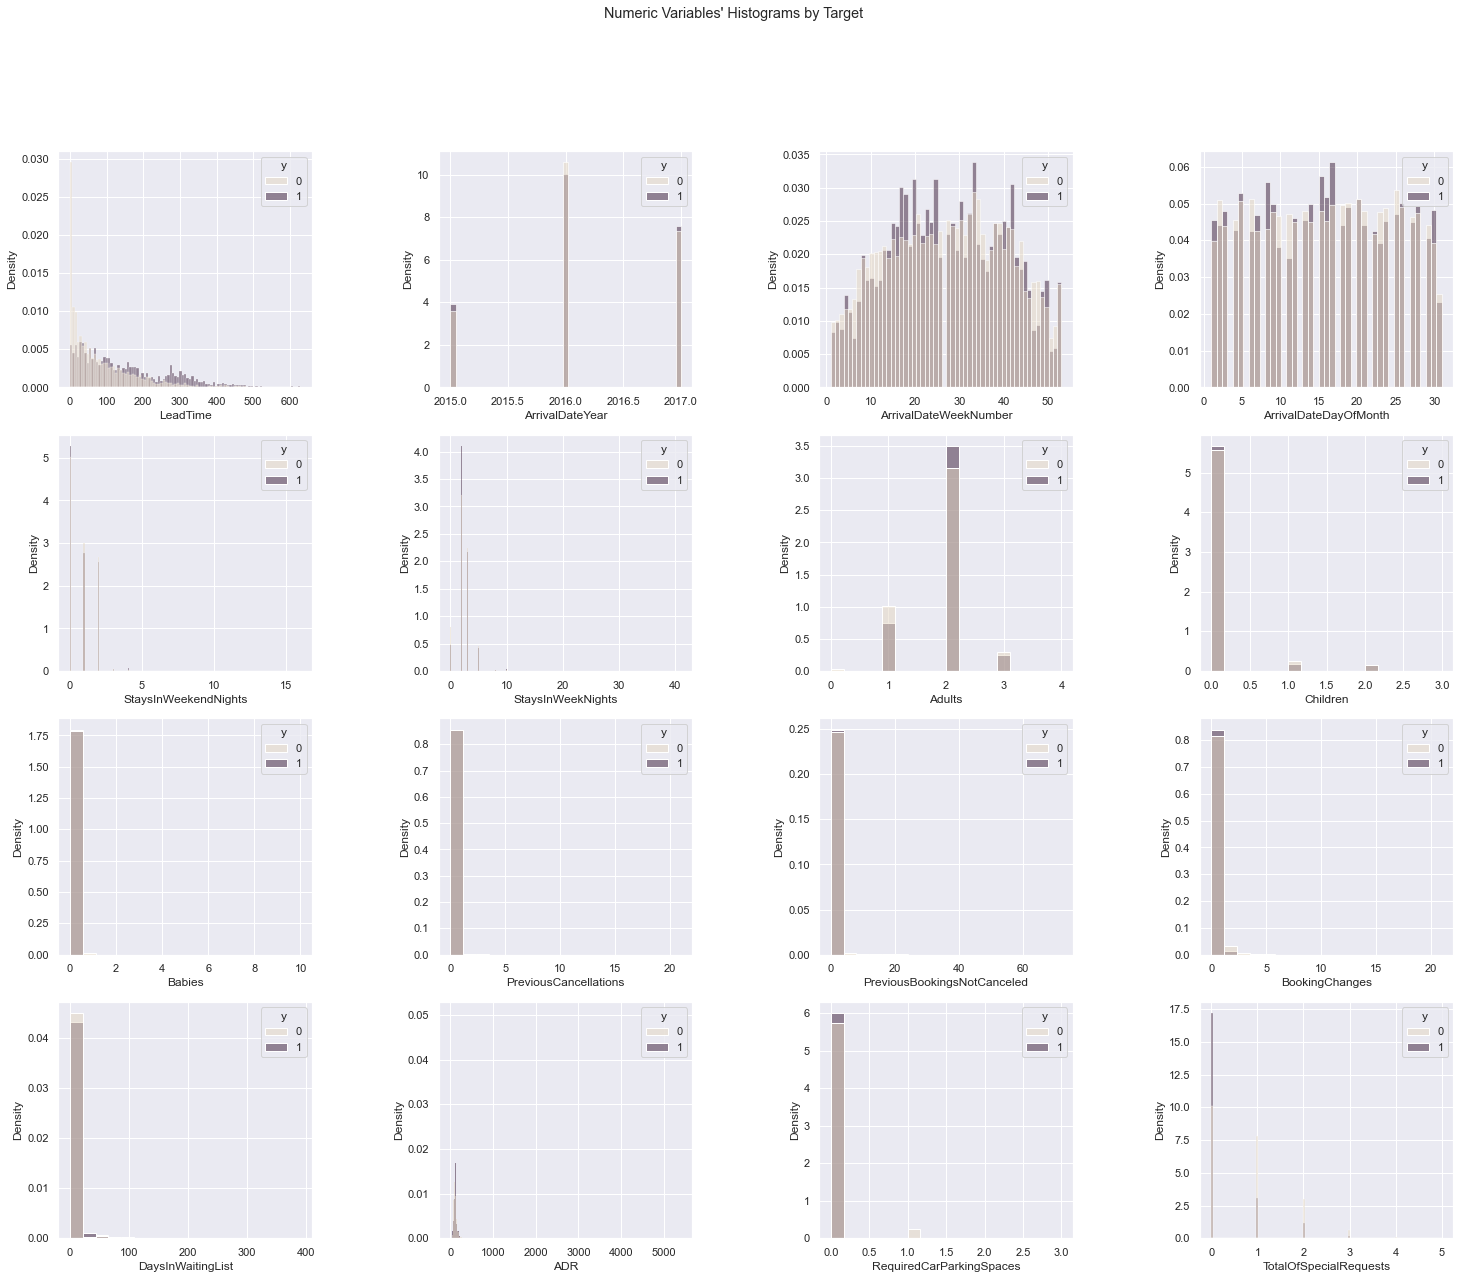

In [42]:
sns.set()

fig, axes = plt.subplots(4, ceil(len(metric_features) / 4), figsize=(25, 20))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=df[feat], hue=df['y'], stat='density', common_norm=False, ax=ax, palette="ch:.25")
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.5)

plt.show()

In [10]:
small_features2 = non_metric_features.copy()
small_features2.remove("Country")
small_features2.remove("ReservationStatusDate")
small_features2.remove("Agent")
small_features2.remove("Company")

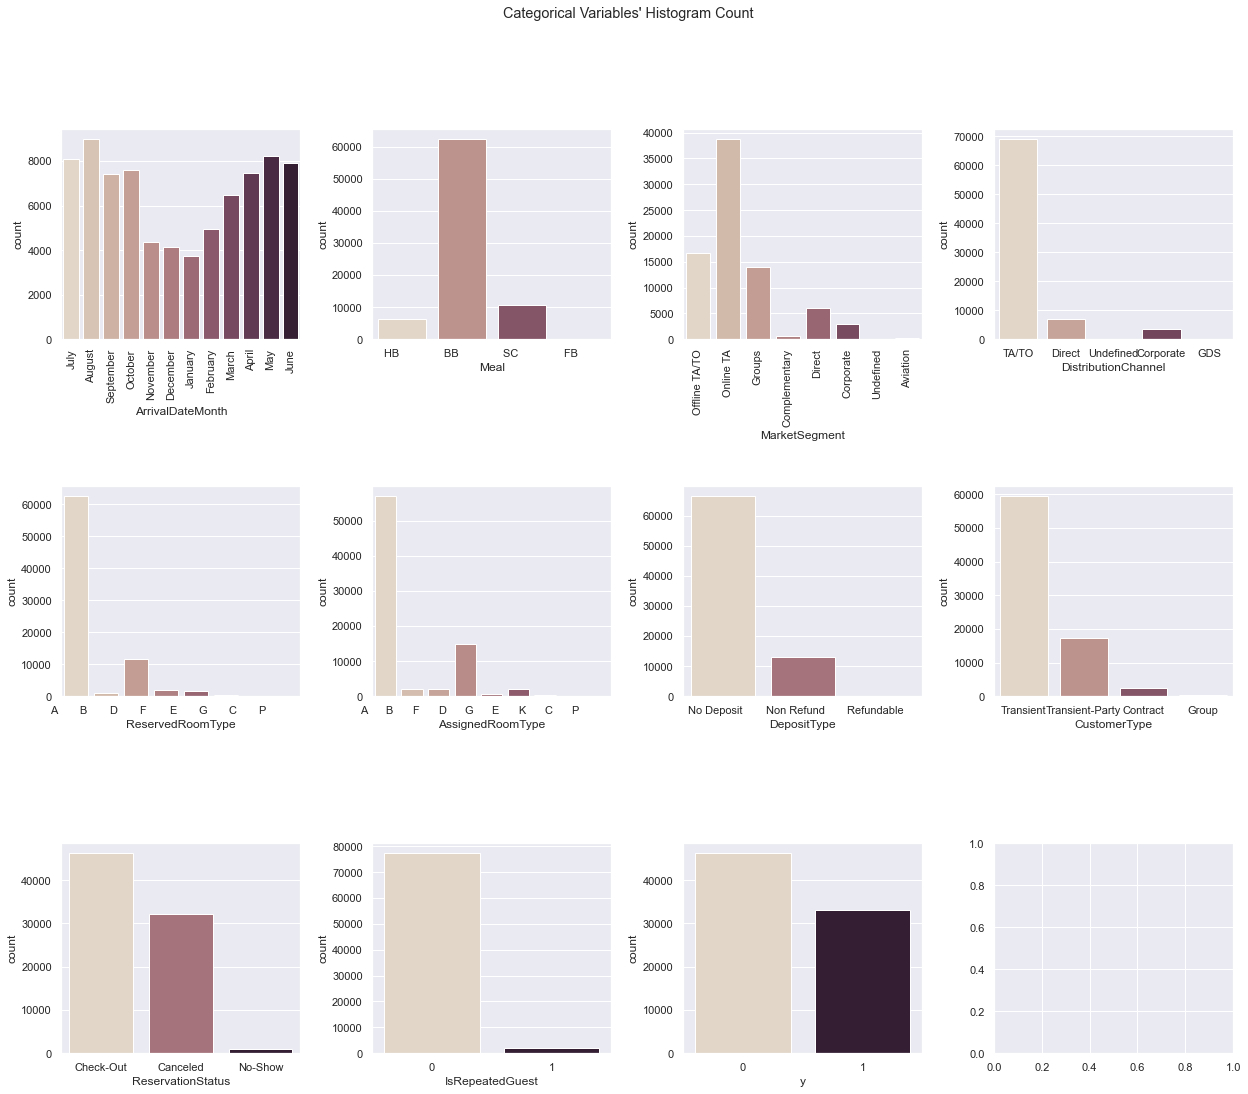

In [45]:
sns.set()

features = small_features2 + ['y']

fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))
for ax, feat in zip(axes.flatten(), features):
    sns.countplot(x=df[feat], ax=ax, palette="ch:.25")

title = "Categorical Variables' Histogram Count"
plt.suptitle(title)

axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

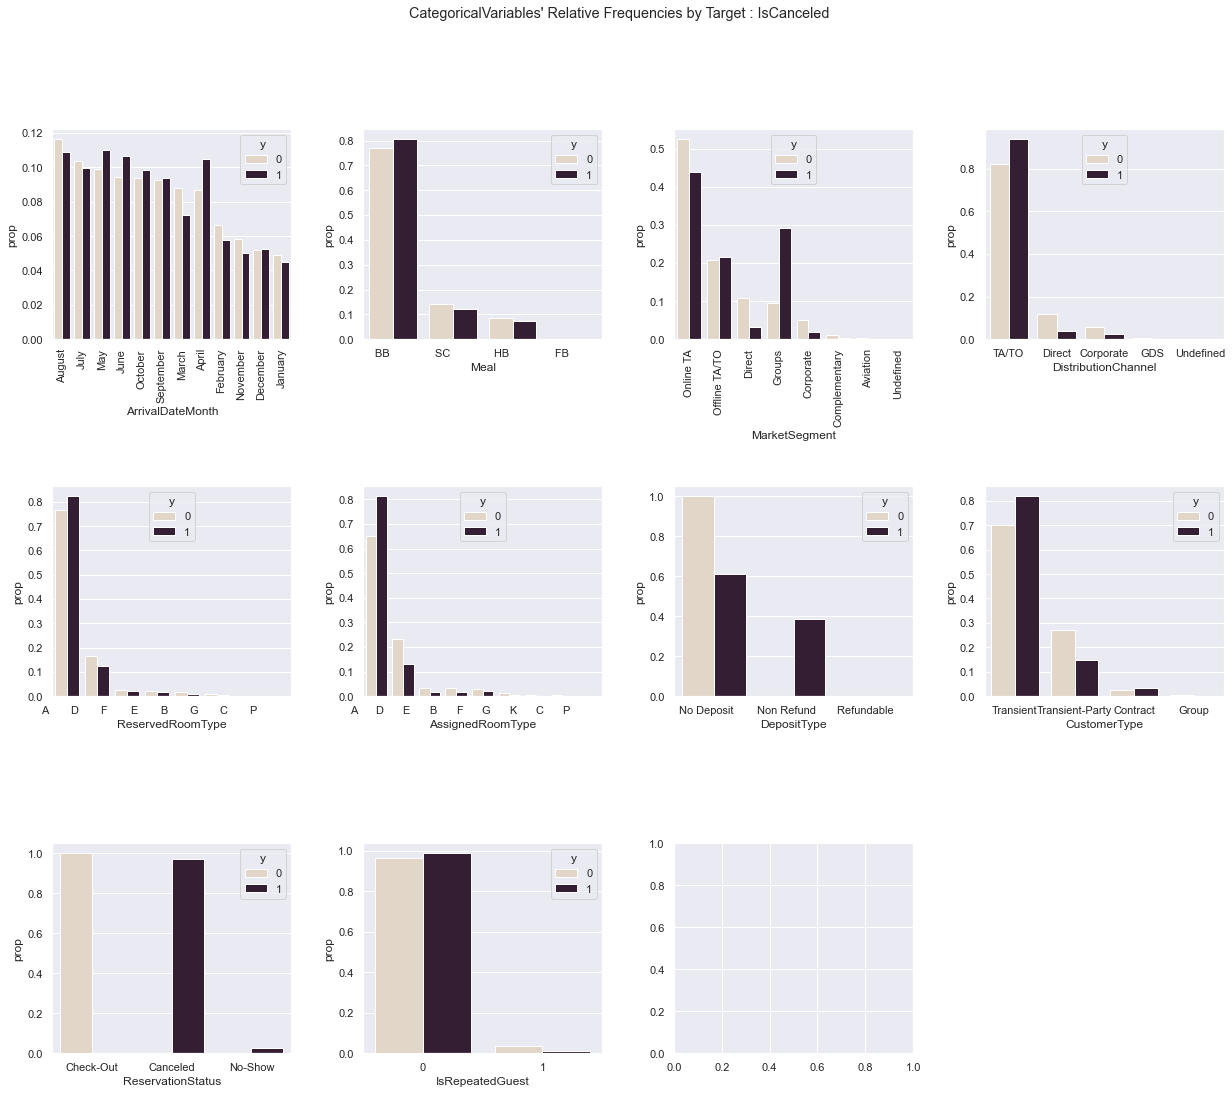

In [47]:
sns.set()

features = small_features2

fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))


for ax, feat in zip(axes.flatten(), features):
    data = df.groupby(['y'])[feat].value_counts(normalize=True).rename('prop').reset_index()
    sns.barplot(data=data, x=feat, y='prop', hue='y', ax=ax,palette="ch:.25")

title = "CategoricalVariables' Relative Frequencies by Target : IsCanceled"
plt.suptitle(title)


axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
axes.flatten()[-1].remove()
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

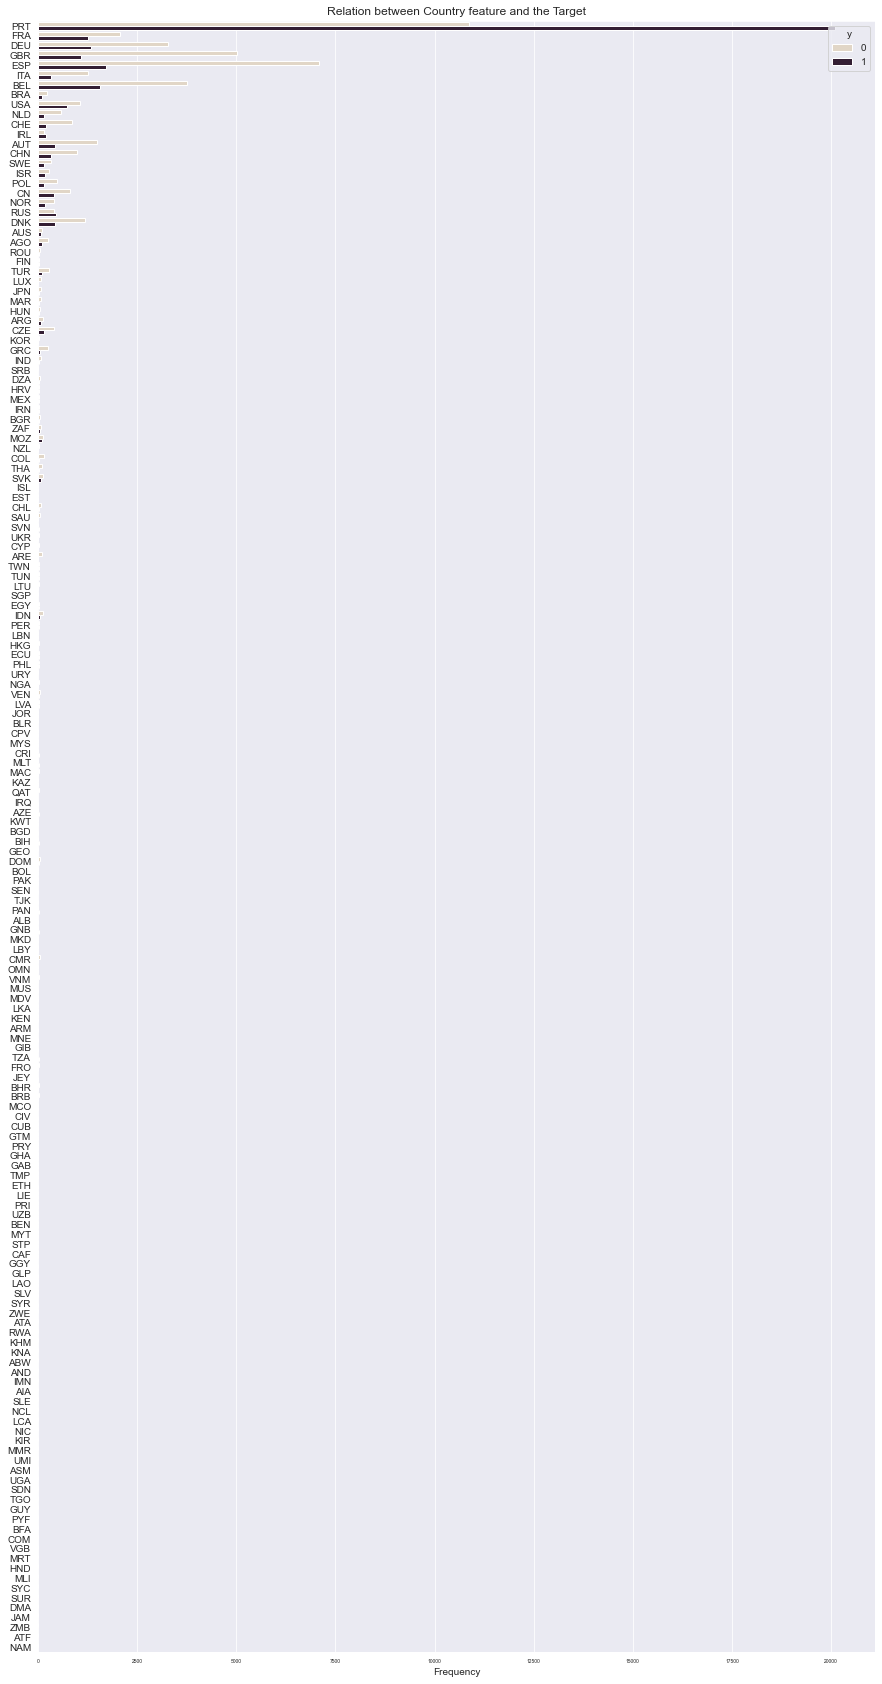

In [246]:
plt.figure(figsize=(15,30))
sns.set_style("darkgrid")


axes=sns.countplot(y=df["Country"], hue=df["y"],palette="ch:.25")
axes.set_yticklabels(list(df["Country"].value_counts().index), size=10)
    
plt.rc('xtick',labelsize=5) 
plt.rc('ytick',labelsize=3) 
plt.xlabel('Frequency',fontsize=10)
plt.ylabel('')
plt.title("Relation between Country feature and the Target")
plt.show()

[Text(0, 0, 'Not Cancelled'), Text(0, 0, 'Cancelled')]

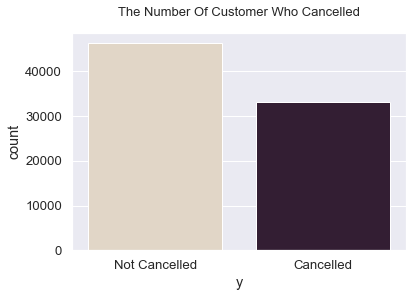

In [624]:
# Target 
ax = plt.axes()
sns.countplot(data=df, x="y",palette="ch:.25")
ax.set_title("The Number Of Customer Who Cancelled", y = 1.05, fontsize=13)
ax.set_xticklabels(labels = ["Not Cancelled", "Cancelled"])

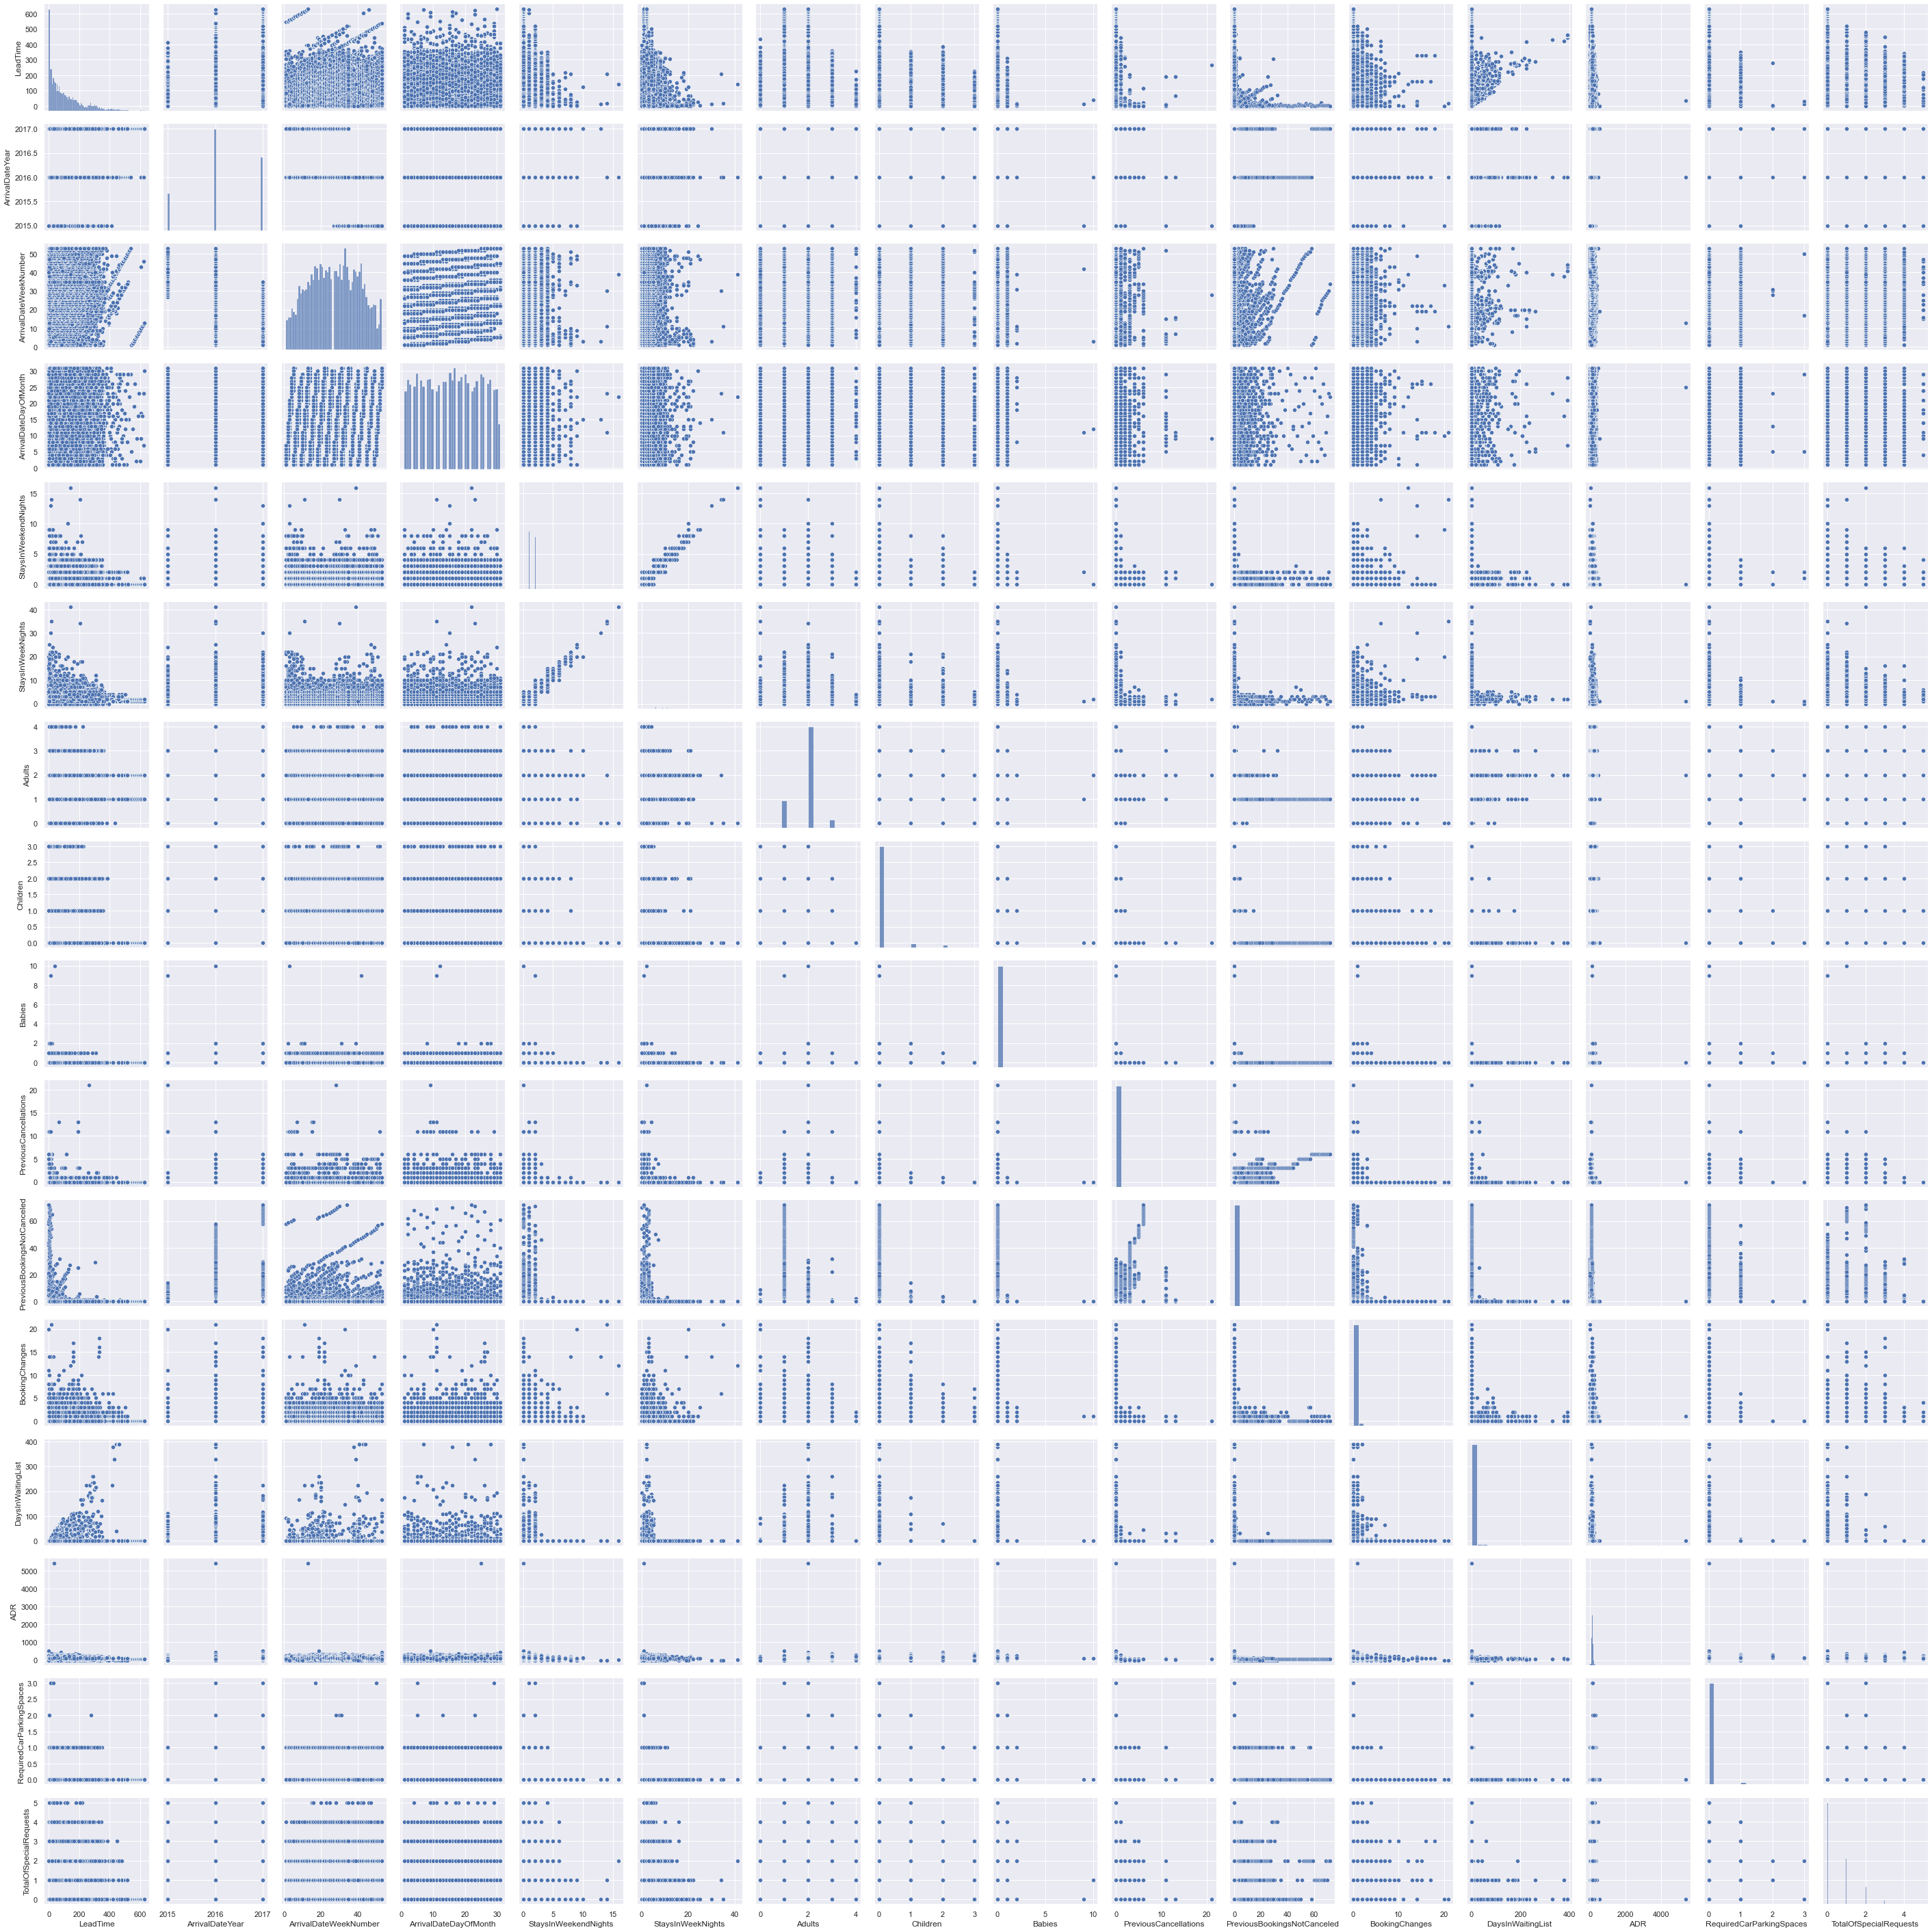

In [89]:
sns.pairplot(df[metric_features])
plt.show()

In [11]:
metric_features_Y = metric_features + ["y"]

interval columns not set, guessing: ['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'y']


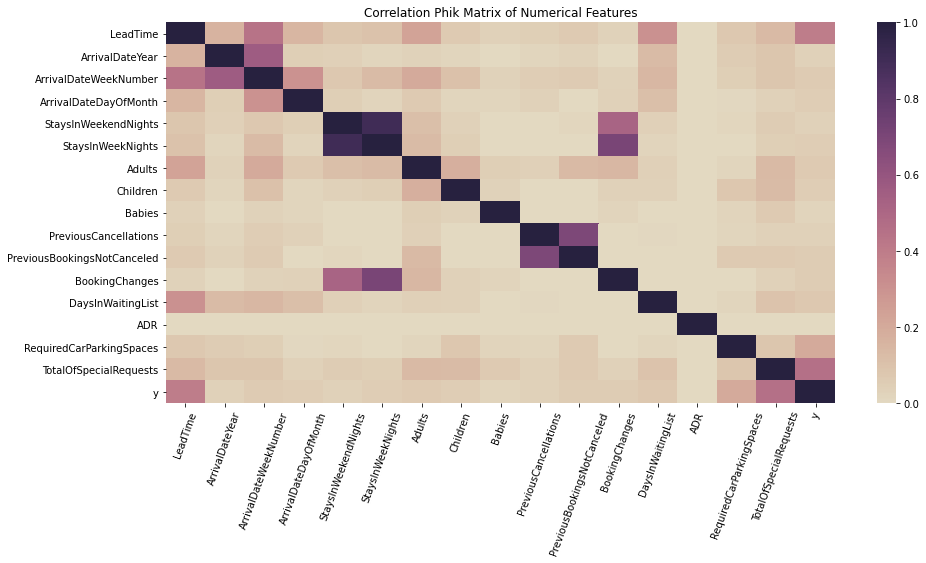

In [12]:
plt.figure(figsize = (15,7))
ax = plt.axes()
res = sns.heatmap(df[metric_features_Y].phik_matrix(),cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), ax=ax)
ax.set_title("Correlation Phik Matrix of Numerical Features")
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 10, rotation = 70)
res.set_yticklabels(res.get_xmajorticklabels(), fontsize = 10)
plt.show()


In [13]:
non_metric_features_Y = small_features2+ ["y"]

interval columns not set, guessing: ['IsRepeatedGuest', 'y']


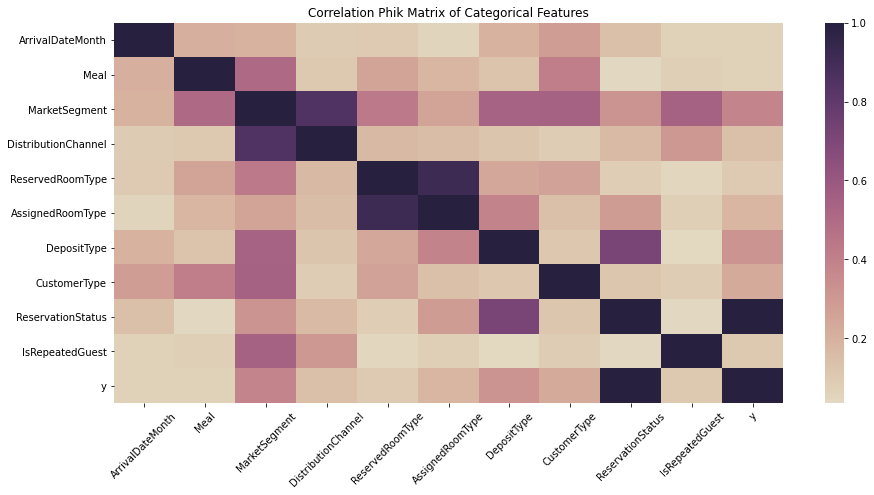

In [14]:
plt.figure(figsize = (15,7))
ax = plt.axes()
res = sns.heatmap(df[non_metric_features_Y].phik_matrix(), cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
ax.set_title("Correlation Phik Matrix of Categorical Features")
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 10, rotation=45)
res.set_yticklabels(res.get_xmajorticklabels(), fontsize = 10,rotation=0)
plt.show()

In [656]:
#Drop "ReservationStatus" because highly correlated as it the same as our target

In [13]:
df.drop(['ReservationStatus'], axis=1, inplace=True) #WAIT

## Data Cleaning

In [14]:
#drop deposit type

In [15]:
df.drop(['DepositType'], axis=1, inplace=True) 

In [16]:
df.head()

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,A,0,6,NULL,0,Transient,0.0,0,0,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,A,0,9,NULL,0,Transient,76.5,0,1,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,A,0,9,NULL,0,Transient,68.0,0,1,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,A,0,9,NULL,0,Transient,76.5,0,2,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,A,0,9,NULL,0,Transient,76.5,0,1,2015-04-02


### Missing Value

In [89]:
# Country has 24 NaN
# Country with the most Canceled = Portugal 
# Put PRT in Country for Nan 

In [17]:
df[df["Country"].isna()]

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
4831,1,193,2015,October,42,15,0,3,2,0.0,...,A,0,12,NULL,0,Transient,65.0,0,0,2015-09-16
4832,1,193,2015,October,42,15,0,3,2,0.0,...,A,0,12,NULL,0,Transient,65.0,0,0,2015-09-16
4833,1,193,2015,October,42,15,0,3,2,0.0,...,A,0,12,NULL,0,Transient,65.0,0,0,2015-09-16
4834,1,193,2015,October,42,15,0,3,2,0.0,...,A,0,12,NULL,0,Transient,65.0,0,0,2015-09-16
4835,1,193,2015,October,42,15,0,3,2,0.0,...,A,0,12,NULL,0,Transient,65.0,0,0,2015-09-16
4836,1,193,2015,October,42,15,0,3,2,0.0,...,A,0,12,NULL,0,Transient,65.0,0,0,2015-09-16
4837,1,193,2015,October,42,15,0,3,2,0.0,...,A,0,12,NULL,0,Transient,65.0,0,0,2015-09-16
4838,1,193,2015,October,42,15,0,3,2,0.0,...,A,0,12,NULL,0,Transient,65.0,0,0,2015-09-16
4839,1,193,2015,October,42,15,0,3,2,0.0,...,A,0,12,NULL,0,Transient,65.0,0,0,2015-09-16
4841,1,193,2015,October,42,15,0,3,2,0.0,...,A,0,12,NULL,0,Transient,65.0,0,0,2015-09-16


In [18]:
df['Country'].fillna(df['Country'].mode()[0], inplace = True)

In [19]:
#Children with 4 NaN
# Replace NaN with mode : 0

In [20]:
df[df["Children"].isna()]

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
540,1,2,2015,August,32,3,1,0,2,NaN,...,B,0,NULL,NULL,0,Transient-Party,12.0,0,1,2015-08-01
607,1,1,2015,August,32,5,0,2,2,NaN,...,B,0,14,NULL,0,Transient-Party,12.0,0,1,2015-08-04
619,1,1,2015,August,32,5,0,2,3,NaN,...,B,0,NULL,NULL,0,Transient-Party,18.0,0,2,2015-08-04
1100,1,8,2015,August,33,13,2,5,2,NaN,...,B,0,9,NULL,0,Transient-Party,76.5,0,1,2015-08-09


In [21]:
df['Children'].fillna(df['Children'].mode()[0], inplace = True)

In [22]:
df.isna().sum()

y                              0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatusDate          0
dtype: int64

In [23]:
df[df['Agent']=="       NULL"]

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
47,1,79,2015,July,28,7,0,3,2,0.0,...,A,0,NULL,NULL,0,Transient,37.33,0,1,2015-06-16
50,1,63,2015,July,28,7,2,5,2,0.0,...,B,0,NULL,NULL,0,Transient-Party,45.00,0,1,2015-07-07
51,1,63,2015,July,28,7,2,5,2,0.0,...,B,2,NULL,NULL,0,Transient-Party,45.00,0,1,2015-07-07
134,1,0,2015,July,29,15,0,1,2,0.0,...,F,0,NULL,NULL,0,Transient,0.00,0,0,2015-07-15
139,0,0,2015,July,29,15,2,5,2,0.0,...,A,4,NULL,NULL,0,Transient,0.00,0,0,2015-07-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79064,0,0,2017,August,35,29,0,1,1,0.0,...,A,0,NULL,72,0,Transient,0.00,0,2,2017-08-30
79091,0,0,2017,August,35,29,0,1,2,2.0,...,G,0,NULL,NULL,0,Transient,270.00,0,0,2017-08-30
79106,0,0,2017,August,35,30,0,1,1,0.0,...,A,0,NULL,NULL,0,Transient,140.00,0,0,2017-08-31
79155,0,2,2017,August,35,31,0,1,1,0.0,...,A,0,NULL,NULL,0,Transient,140.00,0,2,2017-09-01


In [24]:
df['Agent'].replace("       NULL", np.nan, inplace=True)

In [25]:
# Fill NULL values with 0. Interpret as customer that didn't book through a travel agent 
df["Agent"].isna().sum()
df['Agent'].fillna(0, inplace = True)

In [26]:
df["Agent"].isna().sum()

0

In [27]:
#Company NULL
df['Company'].replace("       NULL", np.nan, inplace=True)

In [28]:
df["Company"].isna().sum()
df['Company'].fillna(0, inplace = True)

### Outliers

In [670]:
# Babies Outliers - 10, 9 - to be deleted or fill with 0 

In [29]:
df['Babies'].value_counts()

0     78961
1       361
2         6
10        1
9         1
Name: Babies, dtype: int64

In [30]:
df[df["Babies"]==10]

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
6559,0,37,2016,January,3,12,0,2,2,0.0,...,D,1,9,0,0,Transient,84.45,0,1,2016-01-14


In [31]:
df.drop(6559, inplace=True)

In [32]:
df[df["Babies"]==9]

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
38596,0,11,2015,October,42,11,2,1,1,0.0,...,B,1,95,0,0,Transient-Party,95.0,0,0,2015-10-14


In [33]:
df.drop(38596, inplace=True)

In [34]:
df

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,A,0,6,0,0,Transient,0.00,0,0,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,A,0,9,0,0,Transient,76.50,0,1,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,A,0,9,0,0,Transient,68.00,0,1,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,A,0,9,0,0,Transient,76.50,0,2,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,A,0,9,0,0,Transient,76.50,0,1,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,A,0,394,0,0,Transient,96.14,0,0,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,E,0,9,0,0,Transient,225.43,0,2,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,D,0,9,0,0,Transient,157.71,0,4,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,A,0,89,0,0,Transient,104.40,0,0,2017-09-07


## Feature Engineering 

In [35]:
df_ = df.copy()

In [36]:
#Turn Agent into Binary : (1) customer used a company / Agent to do the booking 
# (0) customer didn't use a third party

In [37]:
df_['Agent'] = df_['Agent'].map(lambda x: 1 if x != 0 else 0)

In [38]:
df_['Company'] = df_['Company'].map(lambda x: 0 if x == 0 else 1)

In [39]:
df_

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,A,0,1,0,0,Transient,0.00,0,0,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,A,0,1,0,0,Transient,76.50,0,1,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,A,0,1,0,0,Transient,68.00,0,1,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,A,0,1,0,0,Transient,76.50,0,2,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,A,0,1,0,0,Transient,76.50,0,1,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,A,0,1,0,0,Transient,96.14,0,0,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,E,0,1,0,0,Transient,225.43,0,2,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,D,0,1,0,0,Transient,157.71,0,4,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,A,0,1,0,0,Transient,104.40,0,0,2017-09-07


In [40]:
months = ["January", "February", "March", "April", "May","June","July","August","September","October","November","December"]

In [41]:
df_['ArrivalDateMonth'] = pd.Categorical(df_['ArrivalDateMonth'], categories=months, ordered=True)

In [42]:
df_.sort_values(by =['ArrivalDateMonth'], inplace=True)

In [43]:
df_

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
22886,1,61,2017,January,4,25,0,2,2,0.0,...,A,0,1,0,0,Transient,80.00,0,0,2016-11-25
6712,0,151,2016,January,4,19,0,2,1,0.0,...,A,2,1,0,63,Transient-Party,71.00,0,0,2016-01-21
6711,0,151,2016,January,4,19,0,2,2,0.0,...,A,4,1,0,63,Transient-Party,86.50,0,0,2016-01-21
6710,0,151,2016,January,4,19,0,2,1,0.0,...,A,2,1,0,63,Transient-Party,70.00,0,0,2016-01-21
6709,0,151,2016,January,4,19,0,2,1,0.0,...,A,2,1,0,63,Transient-Party,70.00,0,0,2016-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63923,0,269,2016,December,53,29,2,3,1,0.0,...,A,0,1,0,0,Transient-Party,70.00,0,0,2017-01-03
63922,0,269,2016,December,53,29,2,3,1,0.0,...,A,0,1,0,0,Transient-Party,70.00,0,0,2017-01-03
63921,0,269,2016,December,53,29,2,3,1,0.0,...,A,0,1,0,0,Transient-Party,70.00,0,0,2017-01-03
63929,0,99,2016,December,53,31,2,1,2,0.0,...,A,0,1,0,0,Transient,141.67,0,3,2017-01-03


In [114]:
#df_.drop(columns = {'month_index'}, inplace= True)

In [115]:
# Turn Month string into number month 

In [44]:
# create mapping
d = dict((v,k) for k,v in zip(range(1, 13), df_.ArrivalDateMonth.unique()))
# create column
df_['month_index'] = df_['ArrivalDateMonth'].map(d)

In [45]:
df_.groupby('ArrivalDateMonth')['month_index'].unique()

ArrivalDateMonth
January        [1]
Categories (1, int64): [1]
February       [2]
Categories (1, int64): [2]
March          [3]
Categories (1, int64): [3]
April          [4]
Categories (1, int64): [4]
May            [5]
Categories (1, int64): [5]
June           [6]
Categories (1, int64): [6]
July           [7]
Categories (1, int64): [7]
August         [8]
Categories (1, int64): [8]
September      [9]
Categories (1, int64): [9]
October      [10]
Categories (1, int64): [10]
November     [11]
Categories (1, int64): [11]
December     [12]
Categories (1, int64): [12]
Name: month_index, dtype: object

In [46]:
df_.drop(columns = {'ArrivalDateMonth'}, inplace = True)

In [47]:
df_.rename(columns = {"month_index" : "ArrivalDateMonth"}, inplace=True)

In [48]:
df_.sort_index()

,y,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,...,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate,ArrivalDateMonth
0,0,6,2015,27,1,0,2,1,0.0,0,...,0,1,0,0,Transient,0.00,0,0,2015-07-03,7
1,1,88,2015,27,1,0,4,2,0.0,0,...,0,1,0,0,Transient,76.50,0,1,2015-07-01,7
2,1,65,2015,27,1,0,4,1,0.0,0,...,0,1,0,0,Transient,68.00,0,1,2015-04-30,7
3,1,92,2015,27,1,2,4,2,0.0,0,...,0,1,0,0,Transient,76.50,0,2,2015-06-23,7
4,1,100,2015,27,2,0,2,2,0.0,0,...,0,1,0,0,Transient,76.50,0,1,2015-04-02,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,35,30,2,5,2,0.0,0,...,0,1,0,0,Transient,96.14,0,0,2017-09-06,8
79326,0,102,2017,35,31,2,5,3,0.0,0,...,0,1,0,0,Transient,225.43,0,2,2017-09-07,8
79327,0,34,2017,35,31,2,5,2,0.0,0,...,0,1,0,0,Transient,157.71,0,4,2017-09-07,8
79328,0,109,2017,35,31,2,5,2,0.0,0,...,0,1,0,0,Transient,104.40,0,0,2017-09-07,8


In [49]:
# data type

In [50]:
df_.dtypes

y                                 int64
LeadTime                          int64
ArrivalDateYear                   int64
ArrivalDateWeekNumber             int64
ArrivalDateDayOfMonth             int64
StaysInWeekendNights              int64
StaysInWeekNights                 int64
Adults                            int64
Children                        float64
Babies                            int64
Meal                             object
Country                          object
MarketSegment                    object
DistributionChannel              object
IsRepeatedGuest                   int64
PreviousCancellations             int64
PreviousBookingsNotCanceled       int64
ReservedRoomType                 object
AssignedRoomType                 object
BookingChanges                    int64
Agent                             int64
Company                           int64
DaysInWaitingList                 int64
CustomerType                     object
ADR                             float64


In [51]:
# Children should be INT 
df_['Children'] = df_['Children'].astype(int)

In [52]:
# ReservationStatusDate should be DATETIME
df_['ReservationStatusDate'] = pd.to_datetime(df_['ReservationStatusDate'])

In [53]:
df_.sort_index(inplace=True)

In [54]:
df_

,y,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,...,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate,ArrivalDateMonth
0,0,6,2015,27,1,0,2,1,0,0,...,0,1,0,0,Transient,0.00,0,0,2015-07-03,7
1,1,88,2015,27,1,0,4,2,0,0,...,0,1,0,0,Transient,76.50,0,1,2015-07-01,7
2,1,65,2015,27,1,0,4,1,0,0,...,0,1,0,0,Transient,68.00,0,1,2015-04-30,7
3,1,92,2015,27,1,2,4,2,0,0,...,0,1,0,0,Transient,76.50,0,2,2015-06-23,7
4,1,100,2015,27,2,0,2,2,0,0,...,0,1,0,0,Transient,76.50,0,1,2015-04-02,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,35,30,2,5,2,0,0,...,0,1,0,0,Transient,96.14,0,0,2017-09-06,8
79326,0,102,2017,35,31,2,5,3,0,0,...,0,1,0,0,Transient,225.43,0,2,2017-09-07,8
79327,0,34,2017,35,31,2,5,2,0,0,...,0,1,0,0,Transient,157.71,0,4,2017-09-07,8
79328,0,109,2017,35,31,2,5,2,0,0,...,0,1,0,0,Transient,104.40,0,0,2017-09-07,8


In [54]:
# One Hot Encoding : Meal, Market segment, DistributionChannel, DepositType, etc

In [55]:
non_metric_features.remove("Country")
non_metric_features.remove("ReservationStatusDate")
non_metric_features.remove("Agent")
non_metric_features.remove("IsRepeatedGuest")
non_metric_features.remove("ArrivalDateMonth")

In [56]:
non_metric_features.remove("Company")

In [57]:
non_metric_features.remove("ReservationStatus")

In [58]:
non_metric_features.remove("DepositType")

In [59]:
df_encoded = pd.get_dummies(df[non_metric_features])
df_encoded.head()

,Meal_BB,Meal_FB,Meal_HB,Meal_SC,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,...,AssignedRoomType_D,AssignedRoomType_E,AssignedRoomType_F,AssignedRoomType_G,AssignedRoomType_K,AssignedRoomType_P,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
pd.set_option('display.max_columns', None)
df_clean = pd.concat([df_,df_encoded],axis = 1)
df_clean.head()

,y,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate,ArrivalDateMonth,Meal_BB,Meal_FB,Meal_HB,Meal_SC,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,MarketSegment_Undefined,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS,DistributionChannel_TA/TO,DistributionChannel_Undefined,ReservedRoomType_A,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_P,AssignedRoomType_A,AssignedRoomType_B,AssignedRoomType_C,AssignedRoomType_D,AssignedRoomType_E,AssignedRoomType_F,AssignedRoomType_G,AssignedRoomType_K,AssignedRoomType_P,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
0,0,6,2015,27,1,0,2,1,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,1,0,0,Transient,0.0,0,0,2015-07-03,7,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1,88,2015,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,1,0,0,Transient,76.5,0,1,2015-07-01,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,65,2015,27,1,0,4,1,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,1,0,0,Transient,68.0,0,1,2015-04-30,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1,92,2015,27,1,2,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,1,0,0,Transient,76.5,0,2,2015-06-23,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,100,2015,27,2,0,2,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,1,0,0,Transient,76.5,0,1,2015-04-02,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [61]:
# remove categorical columns + date 

In [62]:
df_clean.drop(columns = {"Meal","Country","MarketSegment","DistributionChannel", "ReservedRoomType","AssignedRoomType",
                       "CustomerType","ReservationStatusDate"}, axis=1, inplace=True)

In [63]:
#df_clean.drop(columns = {"Meal","Country","MarketSegment","DistributionChannel", "ReservedRoomType","AssignedRoomType",
                        #"DepositType","CustomerType","ReservationStatusDate", "ArrivalDate"}, axis=1, inplace=True)

In [64]:
df_clean

,y,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,Agent,Company,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ArrivalDateMonth,Meal_BB,Meal_FB,Meal_HB,Meal_SC,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,MarketSegment_Undefined,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS,DistributionChannel_TA/TO,DistributionChannel_Undefined,ReservedRoomType_A,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_P,AssignedRoomType_A,AssignedRoomType_B,AssignedRoomType_C,AssignedRoomType_D,AssignedRoomType_E,AssignedRoomType_F,AssignedRoomType_G,AssignedRoomType_K,AssignedRoomType_P,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
0,0,6,2015,27,1,0,2,1,0,0,0,0,0,0,1,0,0,0.00,0,0,7,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1,88,2015,27,1,0,4,2,0,0,0,0,0,0,1,0,0,76.50,0,1,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,65,2015,27,1,0,4,1,0,0,0,0,0,0,1,0,0,68.00,0,1,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1,92,2015,27,1,2,4,2,0,0,0,0,0,0,1,0,0,76.50,0,2,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,100,2015,27,2,0,2,2,0,0,0,0,0,0,1,0,0,76.50,0,1,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,35,30,2,5,2,0,0,0,0,0,0,1,0,0,96.14,0,0,8,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
79326,0,102,2017,35,31,2,5,3,0,0,0,0,0,0,1,0,0,225.43,0,2,8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
79327,0,34,2017,35,31,2,5,2,0,0,0,0,0,0,1,0,0,157.71,0,4,8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
79328,0,109,2017,35,31,2,5,2,0,0,0,0,0,0,1,0,0,104.40,0,0,8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


## Feature Selection

In [65]:
data = df_clean.drop(columns = {"y"}, axis=1)

In [66]:
target = df_clean["y"]

In [747]:
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2, random_state=5, stratify=target)

In [768]:
def select_features(X_train, y_train, X_test, score_type, feat, name):
    if score_type=='chi2':
        fs = SelectKBest(score_func=chis2, k=feat)
    elif score_type=='mutual_info_class':
        fs = SelectKBest(score_func=mutual_info_classif, k=feat)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    #print the score for the features
    for i in range(len(fs.scores_)):
        print('Feature {} {}: Score {}'.format(i, name[i], fs.scores_[i]))
    #plot scores as a graph bar
    plt.figure(figsize=(15,5))
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_, color = sns.color_palette("ch:.25"))
    plt.xticks(ticks =range(len(fs.scores_)), labels = name, rotation="vertical")
    plt.title('Feature Importance', size=20)
    plt.show()
    return X_train_fs, X_test_fs

### Chi Square 

In [749]:
columns = pd.DataFrame(data.columns)

In [750]:
col1 = columns[0].tolist()

Feature 0 LeadTime: Score 666403.5920279489
Feature 1 ArrivalDateYear: Score 0.00011093438042830299
Feature 2 ArrivalDateWeekNumber: Score 3.8549335175238886
Feature 3 ArrivalDateDayOfMonth: Score 20.46798014301771
Feature 4 StaysInWeekendNights: Score 2.2794555635875393
Feature 5 StaysInWeekNights: Score 168.44649790284677
Feature 6 Adults: Score 26.82060847799739
Feature 7 Children: Score 62.806903094459564
Feature 8 Babies: Score 67.91457251461316
Feature 9 IsRepeatedGuest: Score 295.41438008676556
Feature 10 PreviousCancellations: Score 3781.455764132551
Feature 11 PreviousBookingsNotCanceled: Score 3723.4835768966595
Feature 12 BookingChanges: Score 2793.196468777872
Feature 13 Agent: Score 26.986686724862032
Feature 14 Company: Score 517.0153491660114
Feature 15 DaysInWaitingList: Score 30786.13492550134
Feature 16 ADR: Score 211.98111482100566
Feature 17 RequiredCarParkingSpaces: Score 1096.3038046564452
Feature 18 TotalOfSpecialRequests: Score 5929.801554468615
Feature 19 Arriv

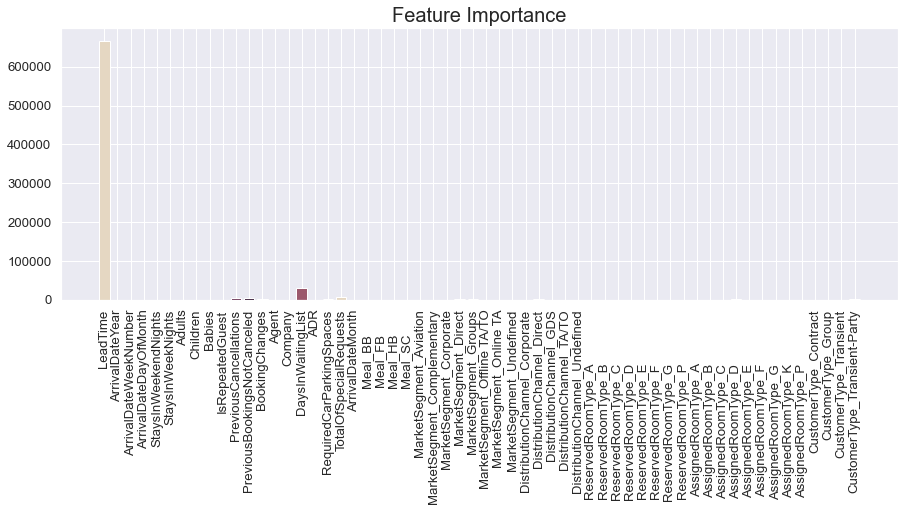

(array([[130, 2016, 16, ..., 0, 1, 0],
        [262, 2017, 33, ..., 0, 1, 0],
        [175, 2017, 33, ..., 0, 1, 0],
        ...,
        [29, 2016, 11, ..., 0, 1, 0],
        [0, 2016, 48, ..., 0, 1, 0],
        [20, 2017, 6, ..., 0, 1, 0]], dtype=object),
 array([[9, 2016, 34, ..., 0, 1, 0],
        [29, 2017, 33, ..., 0, 0, 1],
        [71, 2016, 15, ..., 0, 0, 1],
        ...,
        [279, 2017, 3, ..., 0, 1, 0],
        [587, 2017, 7, ..., 0, 1, 0],
        [251, 2017, 3, ..., 0, 1, 0]], dtype=object))

In [769]:
#Chi-Square
select_features(X_train, y_train, X_test, 'chi2', 'all', col1)

### Mutual Info Classification

Feature 0 LeadTime: Score 0.09692977191326002
Feature 1 ArrivalDateYear: Score 0.0
Feature 2 ArrivalDateWeekNumber: Score 0.00455160251854414
Feature 3 ArrivalDateDayOfMonth: Score 0.0006301069735497045
Feature 4 StaysInWeekendNights: Score 0.0018301068674471122
Feature 5 StaysInWeekNights: Score 0.005886086059040396
Feature 6 Adults: Score 0.01305045686373929
Feature 7 Children: Score 0.0
Feature 8 Babies: Score 0.0011949785648917022
Feature 9 IsRepeatedGuest: Score 0.00019856265574857979
Feature 10 PreviousCancellations: Score 0.04921068650019045
Feature 11 PreviousBookingsNotCanceled: Score 0.006614121735503131
Feature 12 BookingChanges: Score 0.0239805144663654
Feature 13 Agent: Score 0.008990726694624973
Feature 14 Company: Score 0.006643569403726124
Feature 15 DaysInWaitingList: Score 0.018227416692342846
Feature 16 ADR: Score 0.09175072758224667
Feature 17 RequiredCarParkingSpaces: Score 0.016590359272835586
Feature 18 TotalOfSpecialRequests: Score 0.05585157980785738
Feature 19

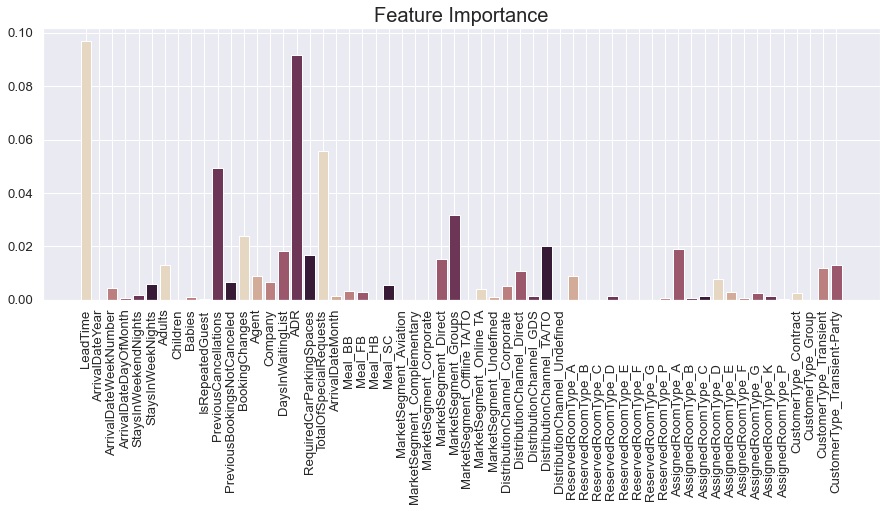

(array([[130, 2016, 16, ..., 0, 1, 0],
        [262, 2017, 33, ..., 0, 1, 0],
        [175, 2017, 33, ..., 0, 1, 0],
        ...,
        [29, 2016, 11, ..., 0, 1, 0],
        [0, 2016, 48, ..., 0, 1, 0],
        [20, 2017, 6, ..., 0, 1, 0]], dtype=object),
 array([[9, 2016, 34, ..., 0, 1, 0],
        [29, 2017, 33, ..., 0, 0, 1],
        [71, 2016, 15, ..., 0, 0, 1],
        ...,
        [279, 2017, 3, ..., 0, 1, 0],
        [587, 2017, 7, ..., 0, 1, 0],
        [251, 2017, 3, ..., 0, 1, 0]], dtype=object))

In [770]:
#Mutual Information Classification
select_features(X_train, y_train, X_test, 'mutual_info_class', 'all', col1)

In [ ]:
#Threshold is 0.009

In [345]:
MIC_features = ["LeadTime","PreviousCancellations","BookingChanges","Agent","DaysInWaitingList", "ADR", "RequiredCarParkingSpaces",
               "TotalOfSpecialRequests","MarketSegment_Direct","MarketSegment_Groups","DistributionChannel_Direct",
               "AssignedRoomType_A","DepositType_No Deposit","DepositType_Non Refund",
               "CustomerType_Transient","CustomerType_Transient-Party", "NumberOfDays"]

In [346]:
metric_features.append("Agent")

### RFE

In [771]:
score_list=[]
model = LogisticRegression()
rfe = RFE(model,20)
X_train_rfe = rfe.fit_transform(X_train,y_train)
X_test_rfe = rfe.transform(X_test)
model.fit(X_train_rfe,y_train)
        
score = model.score(X_test_rfe,y_test)
score_list.append(score)

In [772]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False,  True,
        True, False, False,  True, False, False, False,  True, False,
        True,  True, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False,  True, False,  True])

In [773]:
rfe.ranking_

array([32, 35, 28, 29, 30, 22, 20, 19, 34,  1,  1,  9, 10, 12,  1, 36, 31,
        1,  1, 27, 16,  1, 17, 15,  8,  1, 26,  1,  1, 21, 23, 38, 14,  1,
        1, 13, 37,  1,  2, 39,  4, 18, 24,  1,  1,  1,  1,  3, 25,  6,  5,
        1,  1, 33, 11,  1,  7,  1])

In [774]:
selected_features = pd.Series(rfe.ranking_, index = data.columns)
RFE_features = selected_features.loc[selected_features == 1]

In [775]:
RFE_features.index

Index(['IsRepeatedGuest', 'PreviousCancellations', 'Company',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'Meal_FB       ',
       'MarketSegment_Complementary', 'MarketSegment_Direct',
       'MarketSegment_Groups', 'DistributionChannel_Direct',
       'DistributionChannel_GDS', 'ReservedRoomType_A               ',
       'ReservedRoomType_G               ',
       'ReservedRoomType_P               ',
       'AssignedRoomType_A               ',
       'AssignedRoomType_B               ',
       'AssignedRoomType_G               ',
       'AssignedRoomType_K               ', 'CustomerType_Group',
       'CustomerType_Transient-Party'],
      dtype='object')

In [776]:
RFE_features = RFE_features.index.tolist()

In [781]:
selected_features.sort_values(inplace = True)
selected_features

MarketSegment_Groups                  1
PreviousCancellations                 1
Company                               1
IsRepeatedGuest                       1
CustomerType_Transient-Party          1
RequiredCarParkingSpaces              1
TotalOfSpecialRequests                1
MarketSegment_Complementary           1
MarketSegment_Direct                  1
DistributionChannel_Direct            1
Meal_FB                               1
ReservedRoomType_A                    1
DistributionChannel_GDS               1
AssignedRoomType_K                    1
AssignedRoomType_G                    1
AssignedRoomType_B                    1
CustomerType_Group                    1
ReservedRoomType_P                    1
ReservedRoomType_G                    1
AssignedRoomType_A                    1
ReservedRoomType_B                    2
AssignedRoomType_C                    3
ReservedRoomType_D                    4
AssignedRoomType_F                    5
AssignedRoomType_E                    6


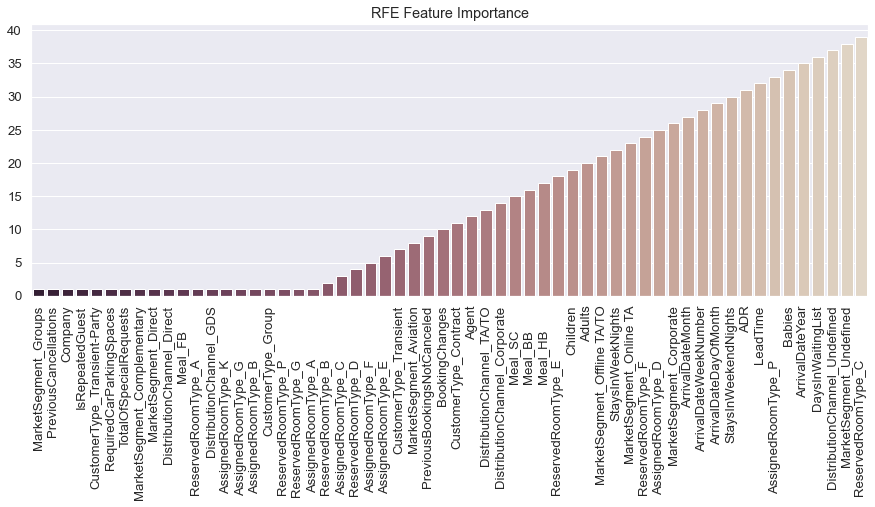

Executing shutdown due to inactivity...


2021-03-13 21:46:57,182 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-03-13 21:46:57,606 - INFO     - Executing shutdown...


In [787]:
plt.figure(figsize = (15,5))
sns.barplot(selected_features.index, selected_features.values, palette="ch:.25_r")
plt.xticks(ticks=range(len(selected_features.index)), rotation="vertical")
plt.title("RFE Feature Importance")
plt.show()

### Combine the feature selection 

In [353]:
features_selection = set.union(set(RFE_features),set(MIC_features))


In [354]:
features_selection.remove("AssignedRoomType_A")
features_selection.remove("DepositType_No Deposit")
features_selection.remove("DepositType_Non Refund")

In [355]:
features_selection

{'ADR',
 'Agent',
 'AssignedRoomType_A               ',
 'AssignedRoomType_B               ',
 'AssignedRoomType_K               ',
 'AssignedRoomType_P               ',
 'Babies',
 'BookingChanges',
 'CustomerType_Transient',
 'CustomerType_Transient-Party',
 'DaysInWaitingList',
 'DepositType_No Deposit     ',
 'DepositType_Non Refund     ',
 'DepositType_Refundable     ',
 'DistributionChannel_Corporate',
 'DistributionChannel_Direct',
 'DistributionChannel_Undefined',
 'LeadTime',
 'MarketSegment_Complementary',
 'MarketSegment_Direct',
 'MarketSegment_Groups',
 'MarketSegment_Online TA',
 'Meal_FB       ',
 'NumberOfDays',
 'PreviousCancellations',
 'RequiredCarParkingSpaces',
 'ReservedRoomType_A               ',
 'ReservedRoomType_B               ',
 'ReservedRoomType_P               ',
 'TotalOfSpecialRequests'}

In [789]:
#df_model = df_clean[features_selection]

In [70]:
random_state=np.random.RandomState(5)

# Modeling 

In [67]:
df_clean_bis = df_clean.drop(columns = {"y"}) #ALL FEATURES

In [68]:
#data = df_model #AFTER FEATURE SELEC

In [69]:
target = df_clean['y']

In [70]:
metric_features.append("ArrivalDateMonth")

#### Normalization of our data

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df_clean_bis,target, test_size=0.2, random_state=5, stratify=target)
scaler = StandardScaler()
X_train[metric_features] = scaler.fit_transform(X_train[metric_features])
X_test[metric_features] = scaler.transform(X_test[metric_features])

### Random Forest Classifier 

In [ ]:
#GriSearchCV

In [227]:
rfc=RandomForestClassifier(n_estimators=100, random_state=5)

In [228]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']
     
# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 68.9min finished


{'n_estimators': 700, 'max_features': 'auto', 'max_depth': 100}


In [292]:
rfc=RandomForestClassifier(n_estimators=700,
                           max_features = "auto",
                           max_depth = 100, 
                           random_state=5,
                           bootstrap=True)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=100, n_estimators=700, random_state=5)

In [293]:
rfc_train = rfc.predict(X_train)
rfc_pred = rfc.predict(X_test)

In [294]:
c_matrix(y_train = y_train, pred_train = rfc_train, y_val = y_test, pred_val = rfc_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     36981
           1       0.99      0.99      0.99     26481

    accuracy                           0.99     63462
   macro avg       0.99      0.99      0.99     63462
weighted avg       0.99      0.99      0.99     63462

[[36790   191]
 [  351 26130]]
___________________________________________________________________________________________________________
                                                     VALIDATION                                                 
-------------------------------------------------------------------------------------------------

In [295]:
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred))

Accuracy: 0.8762763141308458


In [296]:
f1_rfc = f1_score(y_test, rfc_pred, average='micro')
f1_rfc

0.8762763141308458

In [216]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rfc_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfc_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfc_pred)))

Mean Absolute Error: 0.12233707298625993
Mean Squared Error: 0.12233707298625993
Root Mean Squared Error: 0.34976716968043176


In [235]:
rfc_cv_score = cross_val_score(rfc, X_train, y_train, cv=10, scoring="roc_auc")

In [236]:
rfc_cv_score

array([0.93625103, 0.93447405, 0.93852938, 0.93608251, 0.93985113,
       0.94285211, 0.93607904, 0.93693282, 0.93610064, 0.93640434])

In [241]:
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

## Decision Tree

In [271]:
X_train, X_test, y_train, y_test = train_test_split(df_clean_bis,target, test_size=0.2, random_state=5, stratify=target)
scaler = StandardScaler()
X_train[metric_features] = scaler.fit_transform(X_train[metric_features])
X_test[metric_features] = scaler.transform(X_test[metric_features])

In [278]:
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)



In [279]:
dtc_train = dtc.predict(X_train)
dtc_pred = dtc.predict(X_test)

In [280]:
c_matrix(y_train = y_train, pred_train = dtc_train, y_val = y_test, pred_val = dtc_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     36981
           1       0.99      0.98      0.99     26481

    accuracy                           0.99     63462
   macro avg       0.99      0.99      0.99     63462
weighted avg       0.99      0.99      0.99     63462

[[36837   144]
 [  398 26083]]
___________________________________________________________________________________________________________
                                                     VALIDATION                                                 
-------------------------------------------------------------------------------------------------

In [281]:
f1_dtc = f1_score(y_test, dtc_pred, average='micro')
f1_dtc

0.8307702004285894

In [269]:
param_dist ={"criterion": ["entropy", "gini"],
    "splitter": ["random", "best"],
    "max_depth": [3, 6, 9],
    "min_samples_split": [0.005, 0.01, 0.05],
    "max_features": [None, "sqrt"],
    "class_weight": [None, 'balanced', {0: 1, 1: 2}]
    }


tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced', {0: 1, 1: 2}],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 6, 9], 'max_features': [None, 'sqrt'],
                         'min_samples_split': [0.005, 0.01, 0.05],
                         'splitter': ['random', 'best']})

In [282]:
tree_cv.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'min_samples_split': 0.005,
 'splitter': 'best'}

In [277]:
b = tree_cv.best_estimator_
b.score(X_test, y_test)

0.8031639984873314

## Neural Network

In [158]:
X_train, X_test, y_train, y_test = train_test_split(df_clean_bis,target, test_size=0.2, random_state=5, stratify=target)
scaler = StandardScaler()
X_train[metric_features] = scaler.fit_transform(X_train[metric_features])
X_test[metric_features] = scaler.transform(X_test[metric_features])

In [159]:
nn = MLPClassifier()

In [160]:
nn.fit(X_train, y_train)

MLPClassifier()

In [161]:
nn_train = nn.predict(X_train)

In [162]:
nn_pred = nn.predict(X_test)

In [163]:
print('Results on the validation set:')
print(
    # write your code in here
    classification_report(y_true = y_test, y_pred = nn_pred)
)

Results on the validation set:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      9245
           1       0.85      0.75      0.79      6621

    accuracy                           0.84     15866
   macro avg       0.84      0.83      0.83     15866
weighted avg       0.84      0.84      0.84     15866



In [164]:
c_matrix(y_train = y_train, pred_train = nn_train, y_val = y_test, pred_val = nn_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     36981
           1       0.88      0.76      0.82     26481

    accuracy                           0.86     63462
   macro avg       0.86      0.84      0.85     63462
weighted avg       0.86      0.86      0.85     63462

[[34109  2872]
 [ 6276 20205]]
___________________________________________________________________________________________________________
                                                     VALIDATION                                                 
-------------------------------------------------------------------------------------------------

In [165]:
f1_nn = f1_score(y_test, nn_pred, average='micro')
f1_nn

0.8385856548594478

### Stacking Classifier

In [828]:
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))

In [829]:
# define meta learner model
level1 = LogisticRegression()

In [830]:
# define the stacking ensemble
sc = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [831]:
# fit the model on all available data
sc.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('svm', SVC()), ('bayes', GaussianNB())],
                   final_estimator=LogisticRegression())

In [834]:
sc_train = sc.predict(X_train)

In [835]:
sc_pred = sc.predict(X_test)

In [836]:
c_matrix(y_train = y_train, pred_train = sc_train, y_val = y_test, pred_val = sc_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     36981
           1       0.94      0.86      0.90     26481

    accuracy                           0.92     63462
   macro avg       0.92      0.91      0.92     63462
weighted avg       0.92      0.92      0.92     63462

[[35546  1435]
 [ 3627 22854]]
___________________________________________________________________________________________________________
                                                     VALIDATION                                                 
-------------------------------------------------------------------------------------------------

In [837]:
f1_score(y_test, sc_pred, average='micro')

0.8553510651708056

In [140]:
f1_sc = 0.8553510651708056

### Logistic Regression

In [166]:
X_train, X_test, y_train, y_test = train_test_split(df_clean_bis,target, test_size=0.2, random_state=5, stratify=target)
scaler = StandardScaler()
X_train[metric_features] = scaler.fit_transform(X_train[metric_features])
X_test[metric_features] = scaler.transform(X_test[metric_features])

In [246]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [247]:
logreg_cv.best_params_

{'C': 100.0, 'penalty': 'l2'}

In [298]:
log_model = LogisticRegression(C = 100.0, penalty ='l2', solver = 'liblinear')

In [299]:
log_model.fit(X_train,y_train)

LogisticRegression(C=100.0, solver='liblinear')

In [300]:
log_train = log_model.predict(X_train)
log_pred = log_model.predict(X_test)
c_matrix(y_train = y_train, pred_train = log_train, y_val = y_test, pred_val = log_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.86      0.82     36981
           1       0.78      0.68      0.72     26481

    accuracy                           0.78     63462
   macro avg       0.78      0.77      0.77     63462
weighted avg       0.78      0.78      0.78     63462

[[31776  5205]
 [ 8480 18001]]
___________________________________________________________________________________________________________
                                                     VALIDATION                                                 
-------------------------------------------------------------------------------------------------

In [301]:
f1_log = f1_score(y_test, log_pred, average='micro')
f1_log

0.792323206857431

In [237]:
random_state=np.random.RandomState(5)

## Evaluation of Models 

In [176]:
f1 = [f1_rfc,f1_dtc,f1_nn,f1_sc,f1_log]

In [177]:
df_eval = pd.DataFrame(f1)

In [178]:
df_eval["Models"] = ["RandomForest","DecisionTree","NeuralNetwork","Stacking Classfier","LogisticRegression"]

In [179]:
df_eval.rename(columns = {0 : "F1 Score"}, inplace=True)

In [180]:
df_eval = df_eval[["Models", "F1 Score"]]

In [181]:
df_eval

,Models,F1 Score
0,RandomForest,0.877663
1,DecisionTree,0.831968
2,NeuralNetwork,0.838586
3,Stacking Classfier,0.855351
4,LogisticRegression,0.791315


Text(0.5, 1.05, 'Comparison of our Models : F1 Score')

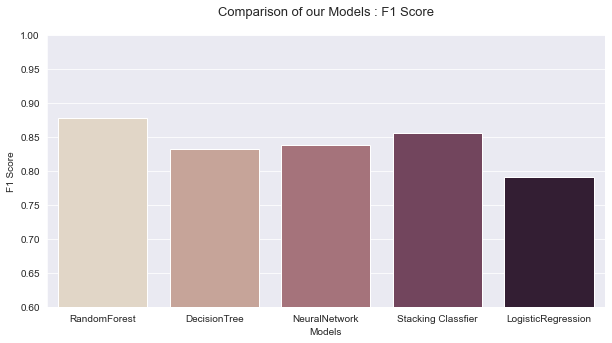

In [191]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,5))
ax = plt.axes()
sns.barplot(x='Models', y='F1 Score', data=df_eval, palette='ch:.25')
ax.set_xticklabels(labels = df_eval["Models"],fontsize = 10)
plt.yticks(size=10)
plt.ylim(0.6, 1)
plt.title("Comparison of our Models : F1 Score", fontsize=13,y=1.05)


### Random Forest Classifier Evaluation 

In [210]:
rfc_cm

array([[8587,  658],
       [1283, 5338]])

In [194]:
rfc_cm = confusion_matrix(y_test,rfc_pred)

In [198]:
Ind = ['Not Canceled', 'Canceled']
Pred = ['Predicted Not Canceled', 'Predicted Canceled']

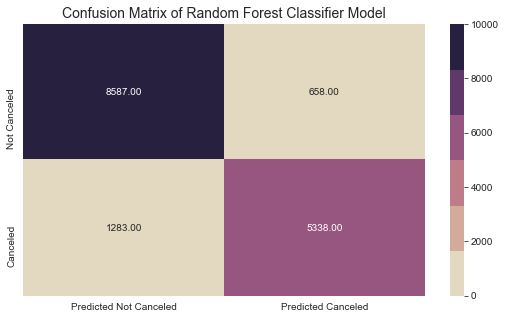

In [209]:
plt.figure(figsize=(9,5))
sns.heatmap(rfc_cm, annot=True, vmin=0.0, vmax=10000.0, xticklabels = Pred, yticklabels = Ind, fmt='.2f', cmap=sns.color_palette("ch:s=-.2,r=.6"))
plt.title("Confusion Matrix of Random Forest Classifier Model", fontsize=14)
plt.show()

In [308]:
(TP+TN)/(TP+FP+FN+TN)

0.87766292701374

In [243]:
#ROC Curve
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

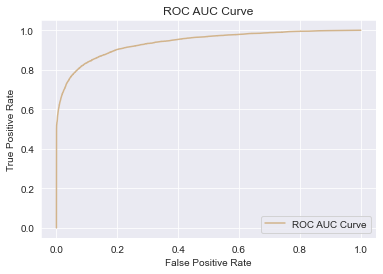

In [302]:
plt.plot(fpr,tpr,label="ROC AUC Curve", color="tan")
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve")
plt.show()

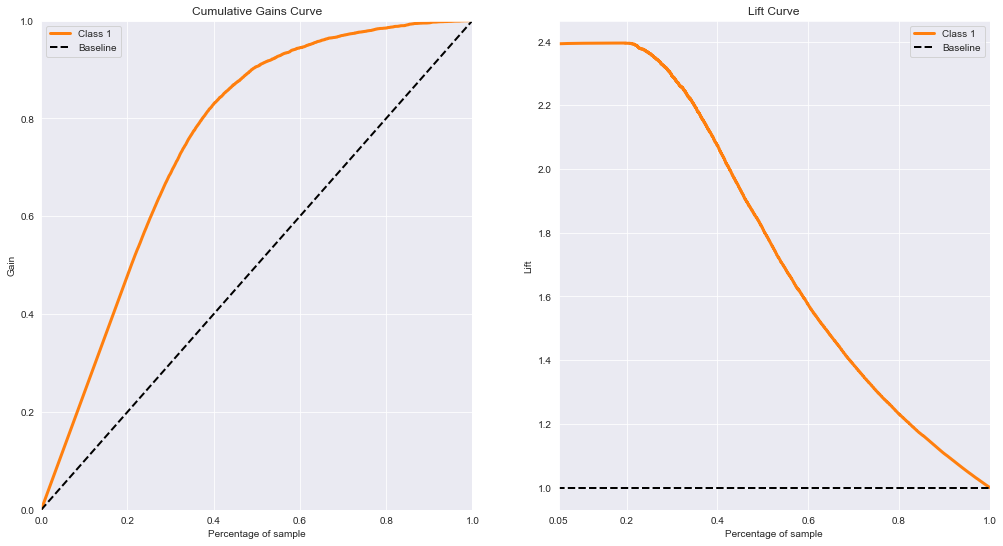

In [242]:
# Plot lift curves
predicted_probas = rfc.predict_proba(X_test)

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 9))
plot_cumulative_gain(y_test, predicted_probas, ax=ax1)
plot_lift_curve(y_test, predicted_probas, ax=ax2)  # Lift is a measure of the effectiveness of a predictive model
                                                   # calculated as the ratio between the results obtained with and 
                                                   # without the predictive model.
# properties
ax2.set_xlim(0.05, 1)
ax2.set_xticks([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_xticklabels([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
for ax in (ax1, ax2):
    ax.axes.lines[0].remove()
    ax.get_legend().remove()
    ax.legend()

plt.show()